In [69]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import matplotlib.patches as patches
%config InlineBackend.figure_format = 'retina'
import warnings


In [43]:
spotify = pd.read_csv('spotify.csv', encoding='ISO-8859-1')

In [44]:
spotify['Release Date'] = pd.to_datetime(spotify['Release Date'])

In [45]:
for column in ['Spotify Streams', 'YouTube Views', 'TikTok Views']:
    spotify[column] = spotify[column].str.replace(',', '').astype(float)

# spotify.info()

In [46]:
# Fill NaN values for specific columns
columns_to_fill = ['Spotify Streams', 'YouTube Views', 'TikTok Views']
spotify[columns_to_fill] = spotify[columns_to_fill].fillna(spotify[columns_to_fill].median())


In [47]:
# Duplicates
spotify = spotify.drop([1637, 4254])
spotify.iloc[np.where(spotify['Artist'] == 'xSyborg')]

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track


In [48]:
top_10 = spotify.loc[:9]

In [49]:
top_streamed_all = spotify[spotify['Spotify Streams'] > 2801110000]
len(top_streamed_all)

18

In [50]:
songs_fron_2024 = spotify[spotify['Release Date'].dt.year == 2024]
len(songs_fron_2024)

top_streamed_2024 = songs_fron_2024[songs_fron_2024['Spotify Streams'] > 600000000]
len(top_streamed_2024)
# top_streamed_2024

20

In [54]:
artist_avg = spotify.groupby('Artist').agg({
    'Spotify Streams': 'mean',
    'YouTube Views': 'mean',
    'TikTok Views': 'mean',
    'Explicit Track': 'any'  
}).reset_index()


In [56]:
artist_avg_sorted = artist_avg.sort_values(by='Spotify Streams', ascending=False).reset_index(drop = True)
top_10_artists = artist_avg_sorted.head(10)
top_10_artists

,Artist,Spotify Streams,YouTube Views,TikTok Views,Explicit Track
0,Vance Joy,2.541834e+09,5.334405e+08,3.108986e+09,False
1,Queen,2.486909e+09,2.036269e+09,2.659172e+08,False
2,John Legend,2.381097e+09,1.537780e+09,4.545633e+08,False
3,Nick White,2.300430e+09,1.482696e+08,2.659172e+08,False
4,Passenger,2.252714e+09,2.195481e+09,4.203312e+08,False
5,The Killers,2.174022e+09,1.839689e+08,2.947392e+08,False
6,Lord Huron,2.097181e+09,8.076727e+08,1.722597e+09,False
7,French Montana,2.065697e+09,2.173793e+09,6.318671e+08,True
8,Arctic Monkeys,1.982152e+09,6.851026e+08,1.435520e+08,False
9,SAINt JHN,1.927962e+09,3.209695e+08,5.257493e+08,True


In [58]:
# Find the top artist in each category
top_spotify_artist = top_10_artists.loc[top_10_artists['Spotify Streams'].idxmax()]
top_youtube_artist = top_10_artists.loc[top_10_artists['YouTube Views'].idxmax()]
top_tiktok_artist = top_10_artists.loc[top_10_artists['TikTok Views'].idxmax()]



findfont: Font family "['Apple Color Emoji'" not found.
findfont: Font family "'sans-serif']" not found.
findfont: Font family "['Apple Color Emoji'" not found.
findfont: Font family "'sans-serif']" not found.
findfont: Font family "['Apple Color Emoji'" not found.
findfont: Font family "'sans-serif']" not found.
findfont: Font family "['Apple Color Emoji'" not found.
findfont: Font family "'sans-serif']" not found.
findfont: Font family "['Apple Color Emoji'" not found.
findfont: Font family "'sans-serif']" not found.
findfont: Font family "['Apple Color Emoji'" not found.
findfont: Font family "'sans-serif']" not found.
findfont: Font family "['Apple Color Emoji'" not found.
findfont: Font family "'sans-serif']" not found.
findfont: Font family "['Apple Color Emoji'" not found.
findfont: Font family "'sans-serif']" not found.
findfont: Font family "['Apple Color Emoji'" not found.
findfont: Font family "'sans-serif']" not found.
findfont: Font family "['Apple Color Emoji'" not found.

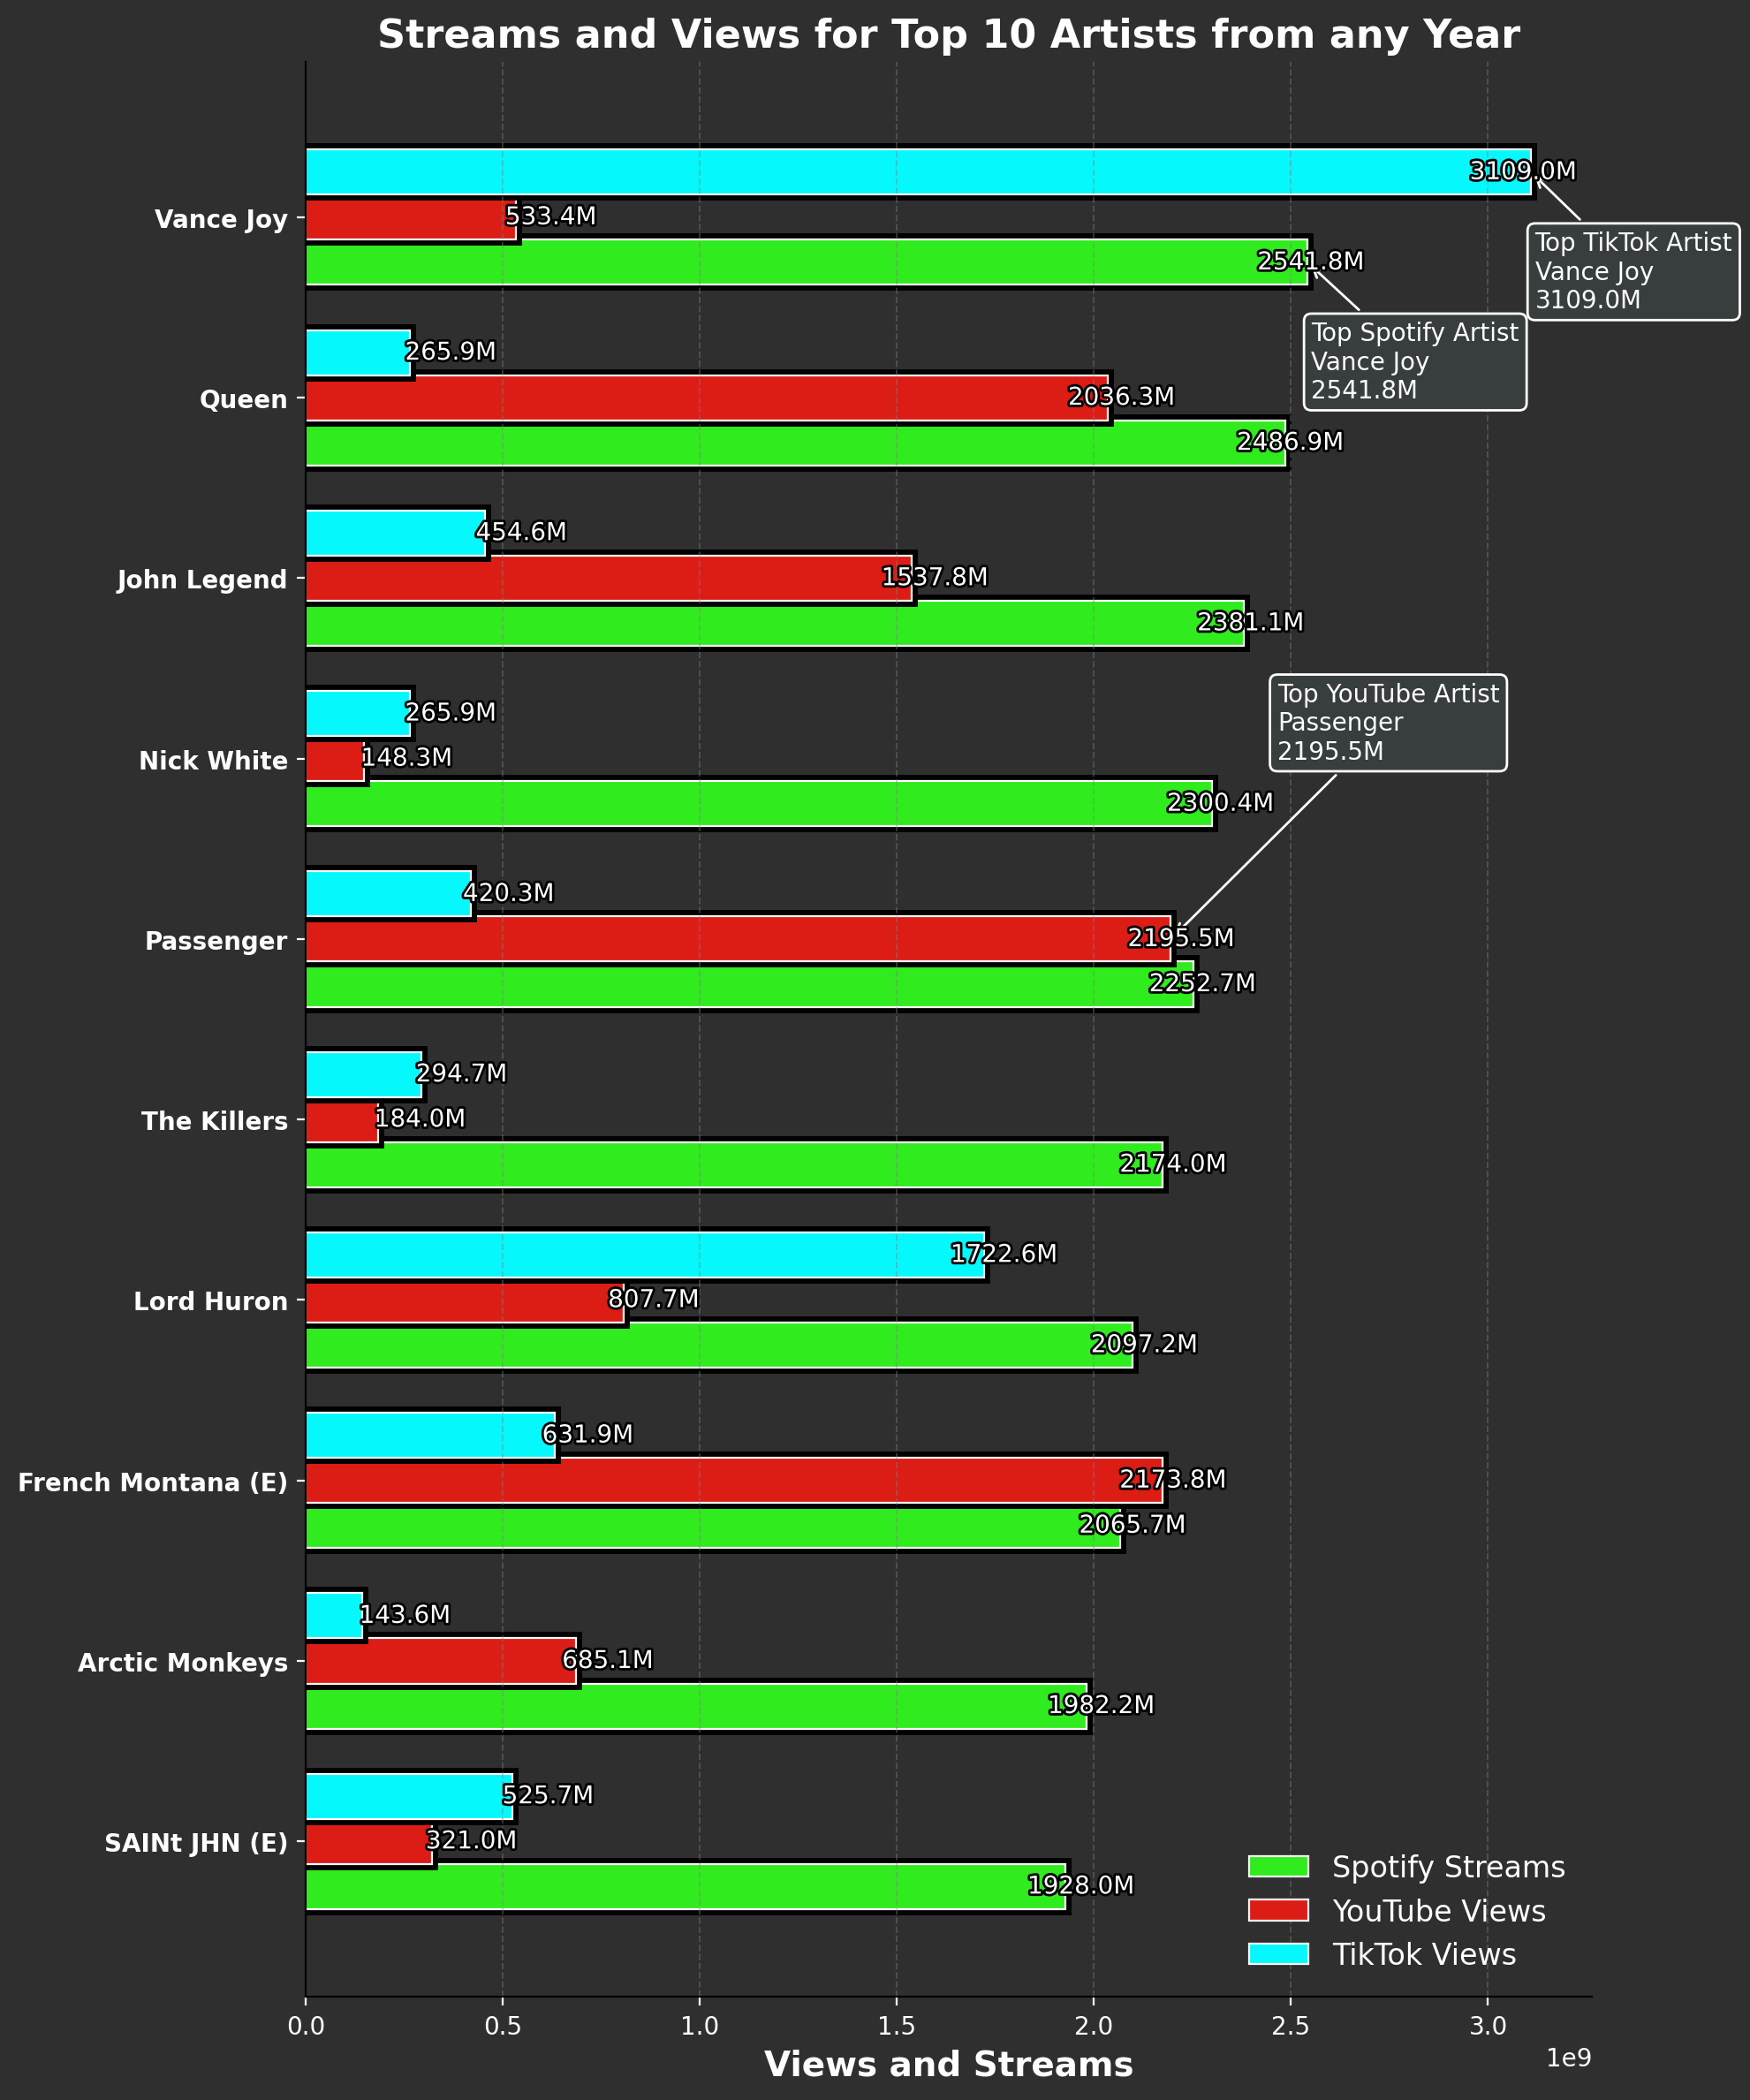

In [59]:
# Define gradient colors for each category
colors = ['#30eb1e', '#db1d16', '#05f8fc']
gradient_colors = ['#90ee90', '#ff7f7f', '#87ceeb']

# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 12))

# Bar width and positions
bar_width = 0.25
y_positions = np.arange(len(top_10_artists['Artist']))
y_positions = y_positions[::-1]

# Plot each category with rounded ends
bars_spotify = ax.barh(
    y=y_positions, 
    width=top_10_artists['Spotify Streams'], 
    color=colors[0], 
    height=bar_width, 
    label='Spotify Streams', 
    align='center',
    edgecolor='white', 
    linewidth=0.8
)

bars_youtube = ax.barh(
    y=y_positions + bar_width, 
    width=top_10_artists['YouTube Views'], 
    color=colors[1], 
    height=bar_width, 
    label='YouTube Views', 
    align='center',
    edgecolor='white', 
    linewidth=0.8
)

bars_tiktok = ax.barh(
    y=y_positions + 2*bar_width, 
    width=top_10_artists['TikTok Views'], 
    color=colors[2], 
    height=bar_width, 
    label='TikTok Views', 
    align='center',
    edgecolor='white', 
    linewidth=0.8
)

# Add rounded caps to the bars
for bars in [bars_spotify, bars_youtube, bars_tiktok]:
    for bar in bars:
        bar.set_capstyle('round')


artist_labels = [
    f"{artist} (E)" if is_explicit else artist
    for artist, is_explicit in zip(top_10_artists['Artist'], top_10_artists['Explicit Track'])
]

# Set y-ticks and labels
ax.set_yticks([p + bar_width for p in y_positions])
ax.set_yticklabels(artist_labels, fontsize=12, color='white', fontweight='bold')


# Add labels and title with custom font and color
ax.set_xlabel('Views and Streams', fontsize=14, color='white', fontweight='bold')
ax.set_title('Streams and Views for Top 10 Artists from any Year', fontsize=16, color='white', fontweight='bold')

# Change all other text to white
ax.tick_params(axis='x', colors='white', labelsize=10)
ax.tick_params(axis='y', colors='white', labelsize=10)

# Set axis face color to a dark theme
ax.set_facecolor('#2f2f2f')
fig.patch.set_facecolor('#2f2f2f')

# Add legend with custom style
legend = ax.legend(fontsize=12, loc='best', frameon=False, facecolor='black', edgecolor='white', labelcolor='white')
for text in legend.get_texts():
    text.set_color("white")

# Add a subtle grid with transparency
ax.grid(axis='x', color='gray', linestyle='--', linewidth=0.7, alpha=0.4)

# Hide the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add a drop shadow effect to bars
for bars in [bars_spotify, bars_youtube, bars_tiktok]:
    for bar in bars:
        bar.set_path_effects([pe.withStroke(linewidth=5, foreground='black')])


# Coordinates for annotation
youtube_x = top_youtube_artist['YouTube Views']
youtube_y = top_10_artists['Artist'].tolist().index(top_youtube_artist['Artist']) + bar_width


# Add annotations
ax.annotate(
    f"Top Spotify Artist\n{top_spotify_artist['Artist']}\n{top_spotify_artist['Spotify Streams']/1e6:.1f}M",
    xy=(top_spotify_artist['Spotify Streams'], y_positions[top_10_artists['Artist'].tolist().index(top_spotify_artist['Artist'])]),
    xytext=(top_spotify_artist['Spotify Streams'] + 1e7, y_positions[top_10_artists['Artist'].tolist().index(top_spotify_artist['Artist'])] - 0.75),
    arrowprops=dict(facecolor='white', edgecolor='white', arrowstyle='->'),
    fontsize=10,
    color='white',
    bbox=dict(boxstyle="round,pad=0.3", edgecolor='white', facecolor='#383d3d')
)

ax.annotate(
    f"Top YouTube Artist\n{top_youtube_artist['Artist']}\n{top_youtube_artist['YouTube Views']/1e6:.1f}M",
    xy=(top_youtube_artist['YouTube Views'], y_positions[top_10_artists['Artist'].tolist().index(top_youtube_artist['Artist'])] + bar_width),
    xytext=(top_youtube_artist['YouTube Views'] + 27e7, y_positions[top_10_artists['Artist'].tolist().index(top_youtube_artist['Artist'])] + bar_width + 1),
    arrowprops=dict(facecolor='white', edgecolor='white', arrowstyle='->'),
    fontsize=10,
    color='white',
    bbox=dict(boxstyle="round,pad=0.3", edgecolor='white', facecolor='#383d3d')
)

ax.annotate(
    f"Top TikTok Artist\n{top_tiktok_artist['Artist']}\n{top_tiktok_artist['TikTok Views']/1e6:.1f}M",
    xy=(top_tiktok_artist['TikTok Views'], y_positions[top_10_artists['Artist'].tolist().index(top_tiktok_artist['Artist'])] + 2*bar_width),
    xytext=(top_tiktok_artist['TikTok Views'] + 1e7, y_positions[top_10_artists['Artist'].tolist().index(top_tiktok_artist['Artist'])] + 2*bar_width - 0.75),
    arrowprops=dict(facecolor='white', edgecolor='white', arrowstyle='->'),
    fontsize=10,
    color='white',
    bbox=dict(boxstyle="round,pad=0.3", edgecolor='white', facecolor='#383d3d')
)

# Add annotations to bars with path effect for shadow
for bars in [bars_spotify, bars_youtube, bars_tiktok]:
    for bar in bars:
        width = bar.get_width()
        # Set the annotation position slightly inside the end of the bar
        ax.text(
            width - 0.05 * width,  # Slightly inside the bar
            bar.get_y() + bar.get_height()/2, 
            f'{width/1e6:.1f}M', 
            va='center', 
            ha='left',  # Align to the right
            fontsize=10, 
            color='white',
            path_effects=[pe.withStroke(linewidth=2, foreground="black")]
        )


# Adjust layout
fig.tight_layout()

# Show the plot
plt.show()

findfont: Font family "['Apple Color Emoji'" not found.
findfont: Font family "'sans-serif']" not found.
findfont: Font family "['Apple Color Emoji'" not found.
findfont: Font family "'sans-serif']" not found.
findfont: Font family "['Apple Color Emoji'" not found.
findfont: Font family "'sans-serif']" not found.
findfont: Font family "['Apple Color Emoji'" not found.
findfont: Font family "'sans-serif']" not found.
findfont: Font family "['Apple Color Emoji'" not found.
findfont: Font family "'sans-serif']" not found.
findfont: Font family "['Apple Color Emoji'" not found.
findfont: Font family "'sans-serif']" not found.
findfont: Font family "['Apple Color Emoji'" not found.
findfont: Font family "'sans-serif']" not found.
findfont: Font family "['Apple Color Emoji'" not found.
findfont: Font family "'sans-serif']" not found.
findfont: Font family "['Apple Color Emoji'" not found.
findfont: Font family "'sans-serif']" not found.
findfont: Font family "['Apple Color Emoji'" not found.

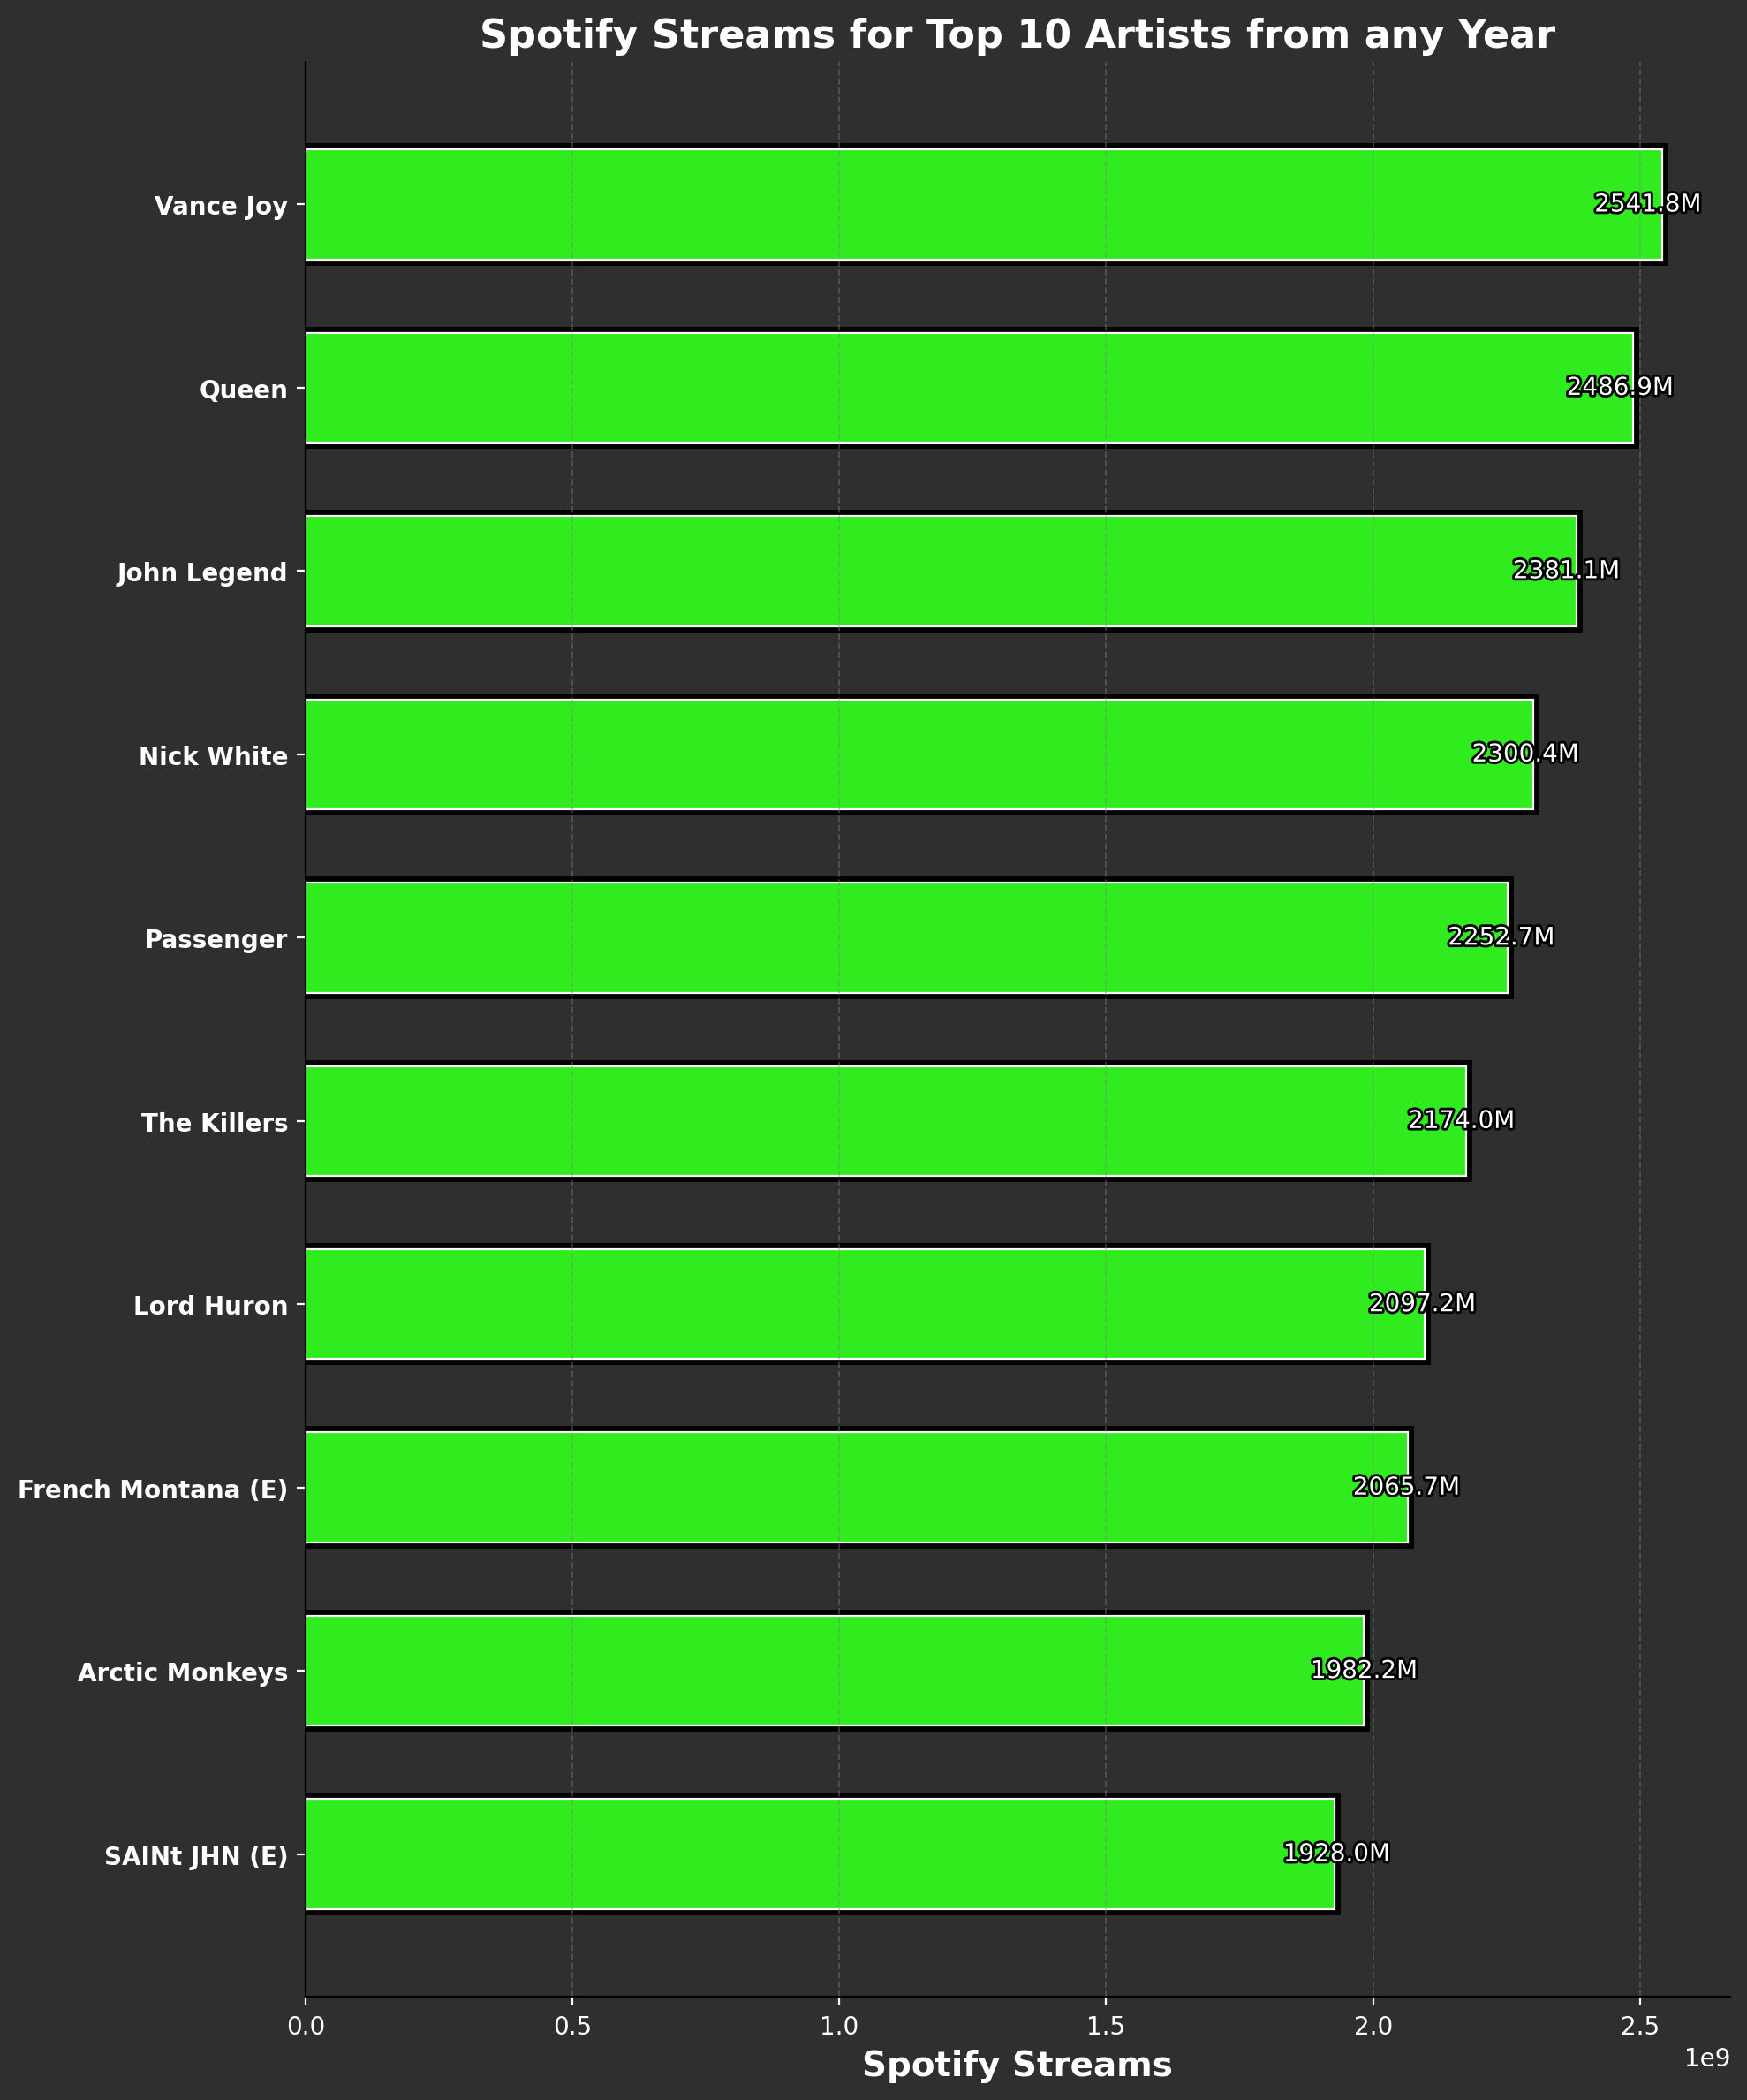

In [60]:
# Define gradient colors for each category
colors = ['#30eb1e']  # Green for Spotify
gradient_colors = ['#90ee90']

# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 12))

# Bar width and positions
bar_width = 0.6
y_positions = np.arange(len(top_10_artists['Artist']))
y_positions = y_positions[::-1]

# Plot Spotify Streams with rounded ends
bars_spotify = ax.barh(
    y=y_positions, 
    width=top_10_artists['Spotify Streams'], 
    color=colors[0], 
    height=bar_width, 
    label='Spotify Streams', 
    align='center',
    edgecolor='white', 
    linewidth=0.8
)

# Add rounded caps to the bars
for bar in bars_spotify:
    bar.set_capstyle('round')

# Create labels with explicit indicator
artist_labels = [
    f"{artist} (E)" if is_explicit else artist
    for artist, is_explicit in zip(top_10_artists['Artist'], top_10_artists['Explicit Track'])
]

# Set y-ticks and labels
ax.set_yticks(y_positions)
ax.set_yticklabels(artist_labels, fontsize=12, color='white', fontweight='bold')

# Add labels and title with custom font and color
ax.set_xlabel('Spotify Streams', fontsize=14, color='white', fontweight='bold')
ax.set_title('Spotify Streams for Top 10 Artists from any Year', fontsize=16, color='white', fontweight='bold')

# Change all other text to white
ax.tick_params(axis='x', colors='white', labelsize=10)
ax.tick_params(axis='y', colors='white', labelsize=10)

# Set axis face color to a dark theme
ax.set_facecolor('#2f2f2f')
fig.patch.set_facecolor('#2f2f2f')


# Add a subtle grid with transparency
ax.grid(axis='x', color='gray', linestyle='--', linewidth=0.7, alpha=0.4)

# Hide the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add a drop shadow effect to bars
for bar in bars_spotify:
    bar.set_path_effects([pe.withStroke(linewidth=5, foreground='black')])

# Add annotations for top Spotify artist
top_spotify_artist = top_10_artists.loc[top_10_artists['Spotify Streams'].idxmax()]



# Add annotations to bars with path effect for shadow
for bar in bars_spotify:
    width = bar.get_width()
    # Set the annotation position slightly inside the end of the bar
    ax.text(
        width - 0.05 * width,  # Slightly inside the bar
        bar.get_y() + bar.get_height()/2, 
        f'{width/1e6:.1f}M', 
        va='center', 
        ha='left',  # Align to the right
        fontsize=10, 
        color='white',
        path_effects=[pe.withStroke(linewidth=2, foreground="black")]
    )

# Adjust layout
fig.tight_layout()

# Show the plot
plt.show()

In [61]:
songs_from_2024 = spotify[spotify['Release Date'].dt.year == 2024]
# Group by artist and calculate the average for each metric
artist_avg_2024 = songs_from_2024.groupby('Artist').agg({
    'Spotify Streams': 'mean',
    'YouTube Views': 'mean',
    'TikTok Views': 'mean',
    'Explicit Track': 'any'
}).reset_index()

In [67]:
artist_avg_2024_sorted = artist_avg_2024.sort_values(by='Spotify Streams', ascending=False).reset_index()
top_10_artists_2024 = artist_avg_2024_sorted.head(16)
top_10_artists_2024
top_10_2024 = top_10_artists_2024.drop([0,1,2,5,10,14]).reset_index(drop=True)
top_10_2024

,index,Artist,Spotify Streams,YouTube Views,TikTok Views,Explicit Track
0,56,Ben King,1.094052e+09,1.482696e+08,2.659172e+08,False
1,184,JAY-Z,1.003216e+09,1.482696e+08,2.659172e+08,True
2,400,The Script,8.589795e+08,1.482696e+08,2.659172e+08,False
3,401,The Weeknd,8.115456e+08,1.482696e+08,2.659172e+08,True
4,36,Artemas,6.013093e+08,1.225991e+08,3.369121e+09,False
5,412,Travis Scott,5.939556e+08,1.482696e+08,2.659172e+08,True
6,241,Linkin Park,5.632269e+08,1.356720e+08,2.659172e+08,False
7,29,Amy Winehouse,5.628146e+08,1.482696e+08,2.659172e+08,False
8,172,Hozier,5.320128e+08,3.762117e+07,2.659172e+08,False
9,350,Sabrina Carpenter,4.202926e+08,1.066161e+08,4.781334e+08,True


In [68]:
# Calculate the average streams/views for Taylor Swift
taylor = songs_from_2024[songs_from_2024['Artist'] == 'Taylor Swift']

# Calculate the average values only if Taylor Swift's data exists
if not taylor.empty:
    avg_taylor = {
        'Spotify Streams': taylor['Spotify Streams'].mean(),
        'YouTube Views': taylor['YouTube Views'].mean(),
        'TikTok Views': taylor['TikTok Views'].mean(),
        'Explicit Track': taylor['Explicit Track'].mode().iloc[0]  # Get the most common value
    }

    # Check if Taylor Swift is already in top_10_2024
    if 'Taylor Swift' not in top_10_2024['Artist'].values:
        # Create a new row DataFrame for Taylor Swift
        taylor_row = pd.DataFrame({
            'Artist': ['Taylor Swift'],
            'Spotify Streams': [avg_taylor['Spotify Streams']],
            'YouTube Views': [avg_taylor['YouTube Views']],
            'TikTok Views': [avg_taylor['TikTok Views']],
            'Explicit Track': [avg_taylor['Explicit Track']]
        })

# Append the new row to your DataFrame
top_10_2024 = pd.concat([top_10_2024, taylor_row], ignore_index=True)

# Print updated DataFrame
print(top_10_2024)

# Ensure the index is reset
top_10_2024.reset_index(drop=True, inplace=True)


    index             Artist  Spotify Streams  YouTube Views  TikTok Views  \
0    56.0           Ben King     1.094052e+09   1.482696e+08  2.659172e+08   
1   184.0              JAY-Z     1.003216e+09   1.482696e+08  2.659172e+08   
2   400.0         The Script     8.589795e+08   1.482696e+08  2.659172e+08   
3   401.0         The Weeknd     8.115456e+08   1.482696e+08  2.659172e+08   
4    36.0            Artemas     6.013093e+08   1.225991e+08  3.369121e+09   
5   412.0       Travis Scott     5.939556e+08   1.482696e+08  2.659172e+08   
6   241.0        Linkin Park     5.632269e+08   1.356720e+08  2.659172e+08   
7    29.0      Amy Winehouse     5.628146e+08   1.482696e+08  2.659172e+08   
8   172.0             Hozier     5.320128e+08   3.762117e+07  2.659172e+08   
9   350.0  Sabrina Carpenter     4.202926e+08   1.066161e+08  4.781334e+08   
10    NaN       Taylor Swift     1.477339e+08   2.503542e+07  1.434609e+08   

    Explicit Track  
0                0  
1                1  


findfont: Font family "['Apple Color Emoji'" not found.
findfont: Font family "'sans-serif']" not found.
findfont: Font family "['Apple Color Emoji'" not found.
findfont: Font family "'sans-serif']" not found.
findfont: Font family "['Apple Color Emoji'" not found.
findfont: Font family "'sans-serif']" not found.
findfont: Font family "['Apple Color Emoji'" not found.
findfont: Font family "'sans-serif']" not found.
findfont: Font family "['Apple Color Emoji'" not found.
findfont: Font family "'sans-serif']" not found.
findfont: Font family "['Apple Color Emoji'" not found.
findfont: Font family "'sans-serif']" not found.
findfont: Font family "['Apple Color Emoji'" not found.
findfont: Font family "'sans-serif']" not found.
findfont: Font family "['Apple Color Emoji'" not found.
findfont: Font family "'sans-serif']" not found.
findfont: Font family "['Apple Color Emoji'" not found.
findfont: Font family "'sans-serif']" not found.
findfont: Font family "['Apple Color Emoji'" not found.

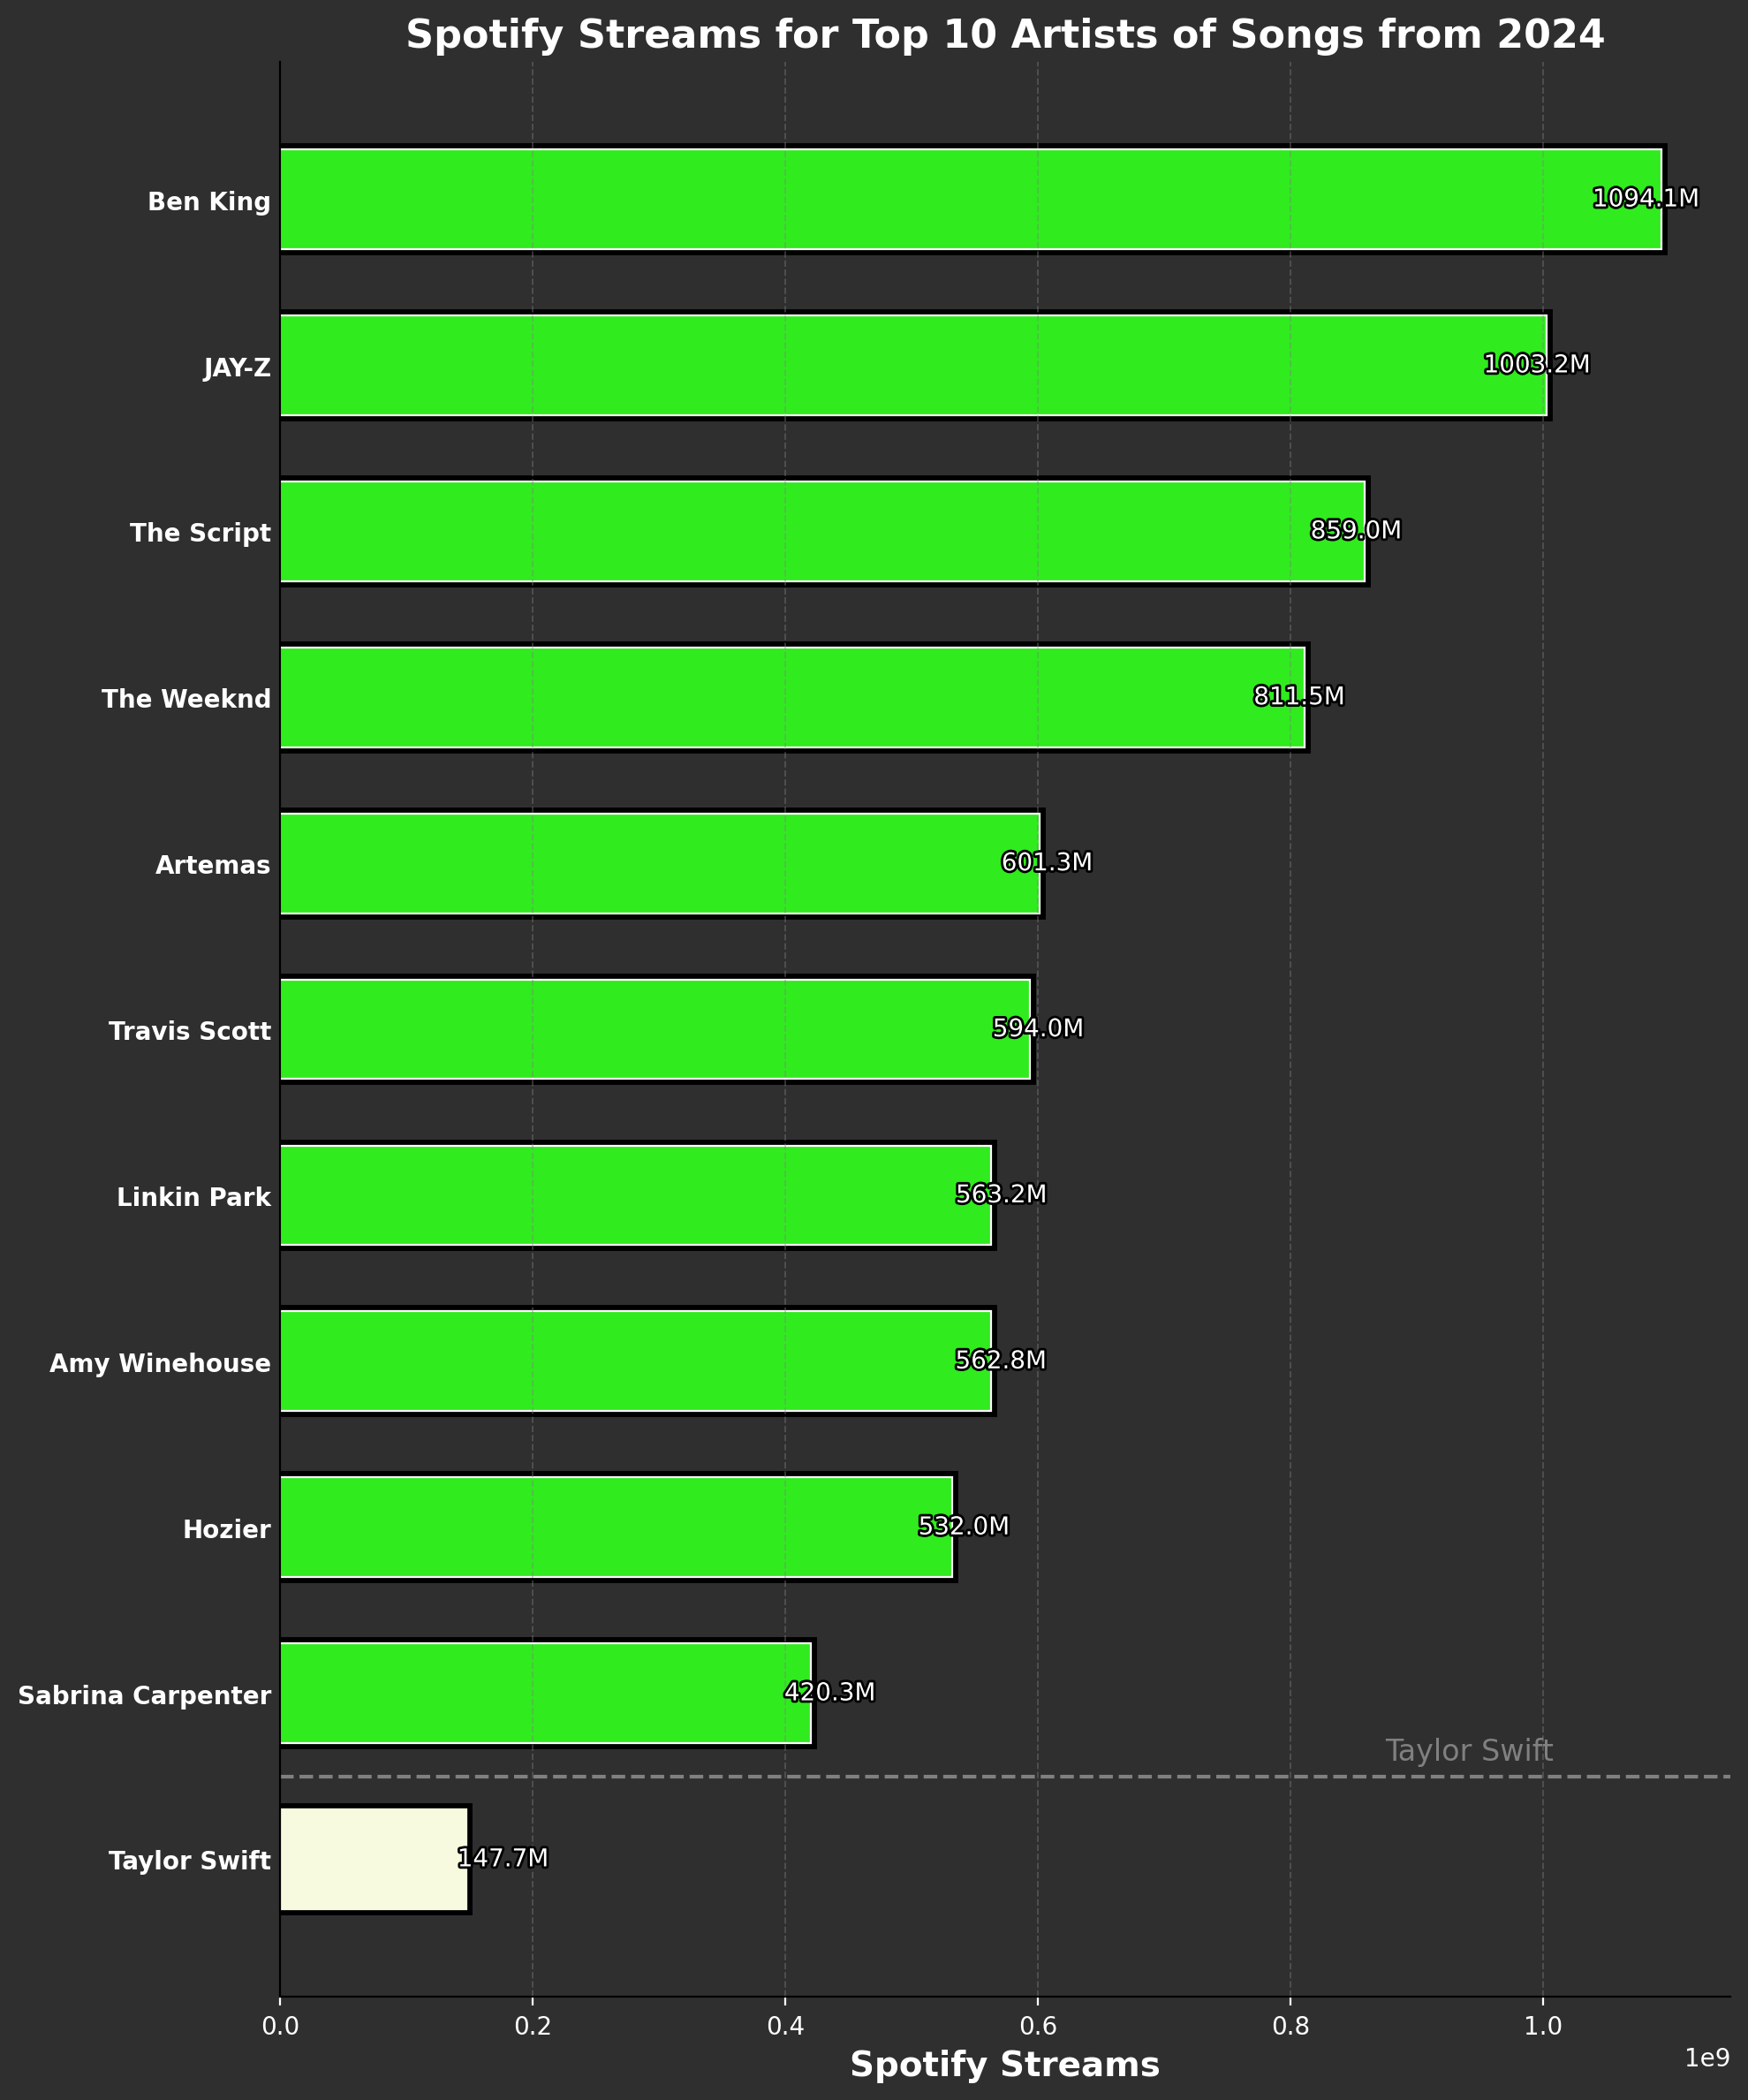

In [70]:


# Define colors for Spotify Streams
colors = ['#30eb1e']  # Green color for Spotify Streams

# Edge color specifically for Spotify Streams
taylor_edge_color = '#30eb1e'

# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 12))

# Bar width and positions
bar_width = 0.6
y_positions = np.arange(len(top_10_2024['Artist']))
y_positions = y_positions[::-1]

# Plot Spotify Streams only
bars_spotify = ax.barh(
    y=y_positions, 
    width=top_10_2024['Spotify Streams'], 
    color=colors[0],
    height=bar_width, 
    label='Spotify Streams', 
    align='center',
    edgecolor=[taylor_edge_color if artist == 'Taylor Swift' else 'white' for artist in top_10_2024['Artist']], 
    linewidth=0.8  # Increase line width for visibility
)

# Add rounded caps to the bars
for bar in bars_spotify:
    bar.set_capstyle('round')

# Highlight Taylor Swift's bar
highlight_color = '#f7fade' 
highlight_idx = top_10_2024[top_10_2024['Artist'] == 'Taylor Swift'].index[0]

# Change color for Taylor Swift's bars
bars_spotify[highlight_idx].set_color(highlight_color)

# Set y-ticks and labels
ax.set_yticks(y_positions)
ax.set_yticklabels(top_10_2024['Artist'], fontsize=12, color='white', fontweight='bold')
ax.tick_params(axis='y', which='both', length=0)

# Add labels and title with custom font and color
ax.set_xlabel('Spotify Streams', fontsize=14, color='white', fontweight='bold')
ax.set_title('Spotify Streams for Top 10 Artists of Songs from 2024', fontsize=16, color='white', fontweight='bold')

# Change all other text to white
ax.tick_params(axis='x', colors='white', labelsize=10)
ax.tick_params(axis='y', colors='white', labelsize=10)

# Set axis face color to a dark theme
ax.set_facecolor('#2f2f2f')
fig.patch.set_facecolor('#2f2f2f')

# Add a subtle grid with transparency
ax.grid(axis='x', color='gray', linestyle='--', linewidth=0.7, alpha=0.4)

# Hide the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add a drop shadow effect to bars
for bar in bars_spotify:
    bar.set_path_effects([pe.withStroke(linewidth=5, foreground='black')])

# Add annotations for Spotify Streams
for bar in bars_spotify:
    width = bar.get_width()
    # Set the annotation position slightly inside the end of the bar
    ax.text(
        width - 0.05 * width,  # Slightly inside the bar
        bar.get_y() + bar.get_height()/2, 
        f'{width/1e6:.1f}M', 
        va='center', 
        ha='left',  # Align to the right
        fontsize=10, 
        color='white',
        path_effects=[pe.withStroke(linewidth=2, foreground="black")]
    )

# Add annotations to highlight top Spotify artist
top_spotify_artist = top_10_2024.loc[top_10_2024['Spotify Streams'].idxmax()]

# Add a horizontal line at a specific y-coordinate
taylor_swift_index = top_10_2024[top_10_2024['Artist'] == 'Taylor Swift'].index[0]
taylor_swift_y = y_positions[taylor_swift_index]

# Add the horizontal line
ax.axhline(y=taylor_swift_y + 0.5, color='gray', linestyle='--', linewidth=1.5)

# Add text annotation for Taylor Swift above and to the left of the line
ax.text(
    top_10_2024['Spotify Streams'].max() * 0.8,  # Position text to the left side of the plot (adjust as needed)
    taylor_swift_y + 0.6,  # Slightly above the line
    'Taylor Swift',
    color='gray',
    fontsize=12
)

# Adjust layout
fig.tight_layout()

# Show the plot
plt.show()

findfont: Font family "['Apple Color Emoji'" not found.
findfont: Font family "'sans-serif']" not found.
findfont: Font family "['Apple Color Emoji'" not found.
findfont: Font family "'sans-serif']" not found.
findfont: Font family "['Apple Color Emoji'" not found.
findfont: Font family "'sans-serif']" not found.
findfont: Font family "['Apple Color Emoji'" not found.
findfont: Font family "'sans-serif']" not found.
findfont: Font family "['Apple Color Emoji'" not found.
findfont: Font family "'sans-serif']" not found.
findfont: Font family "['Apple Color Emoji'" not found.
findfont: Font family "'sans-serif']" not found.
findfont: Font family "['Apple Color Emoji'" not found.
findfont: Font family "'sans-serif']" not found.
findfont: Font family "['Apple Color Emoji'" not found.
findfont: Font family "'sans-serif']" not found.
findfont: Font family "['Apple Color Emoji'" not found.
findfont: Font family "'sans-serif']" not found.
findfont: Font family "['Apple Color Emoji'" not found.

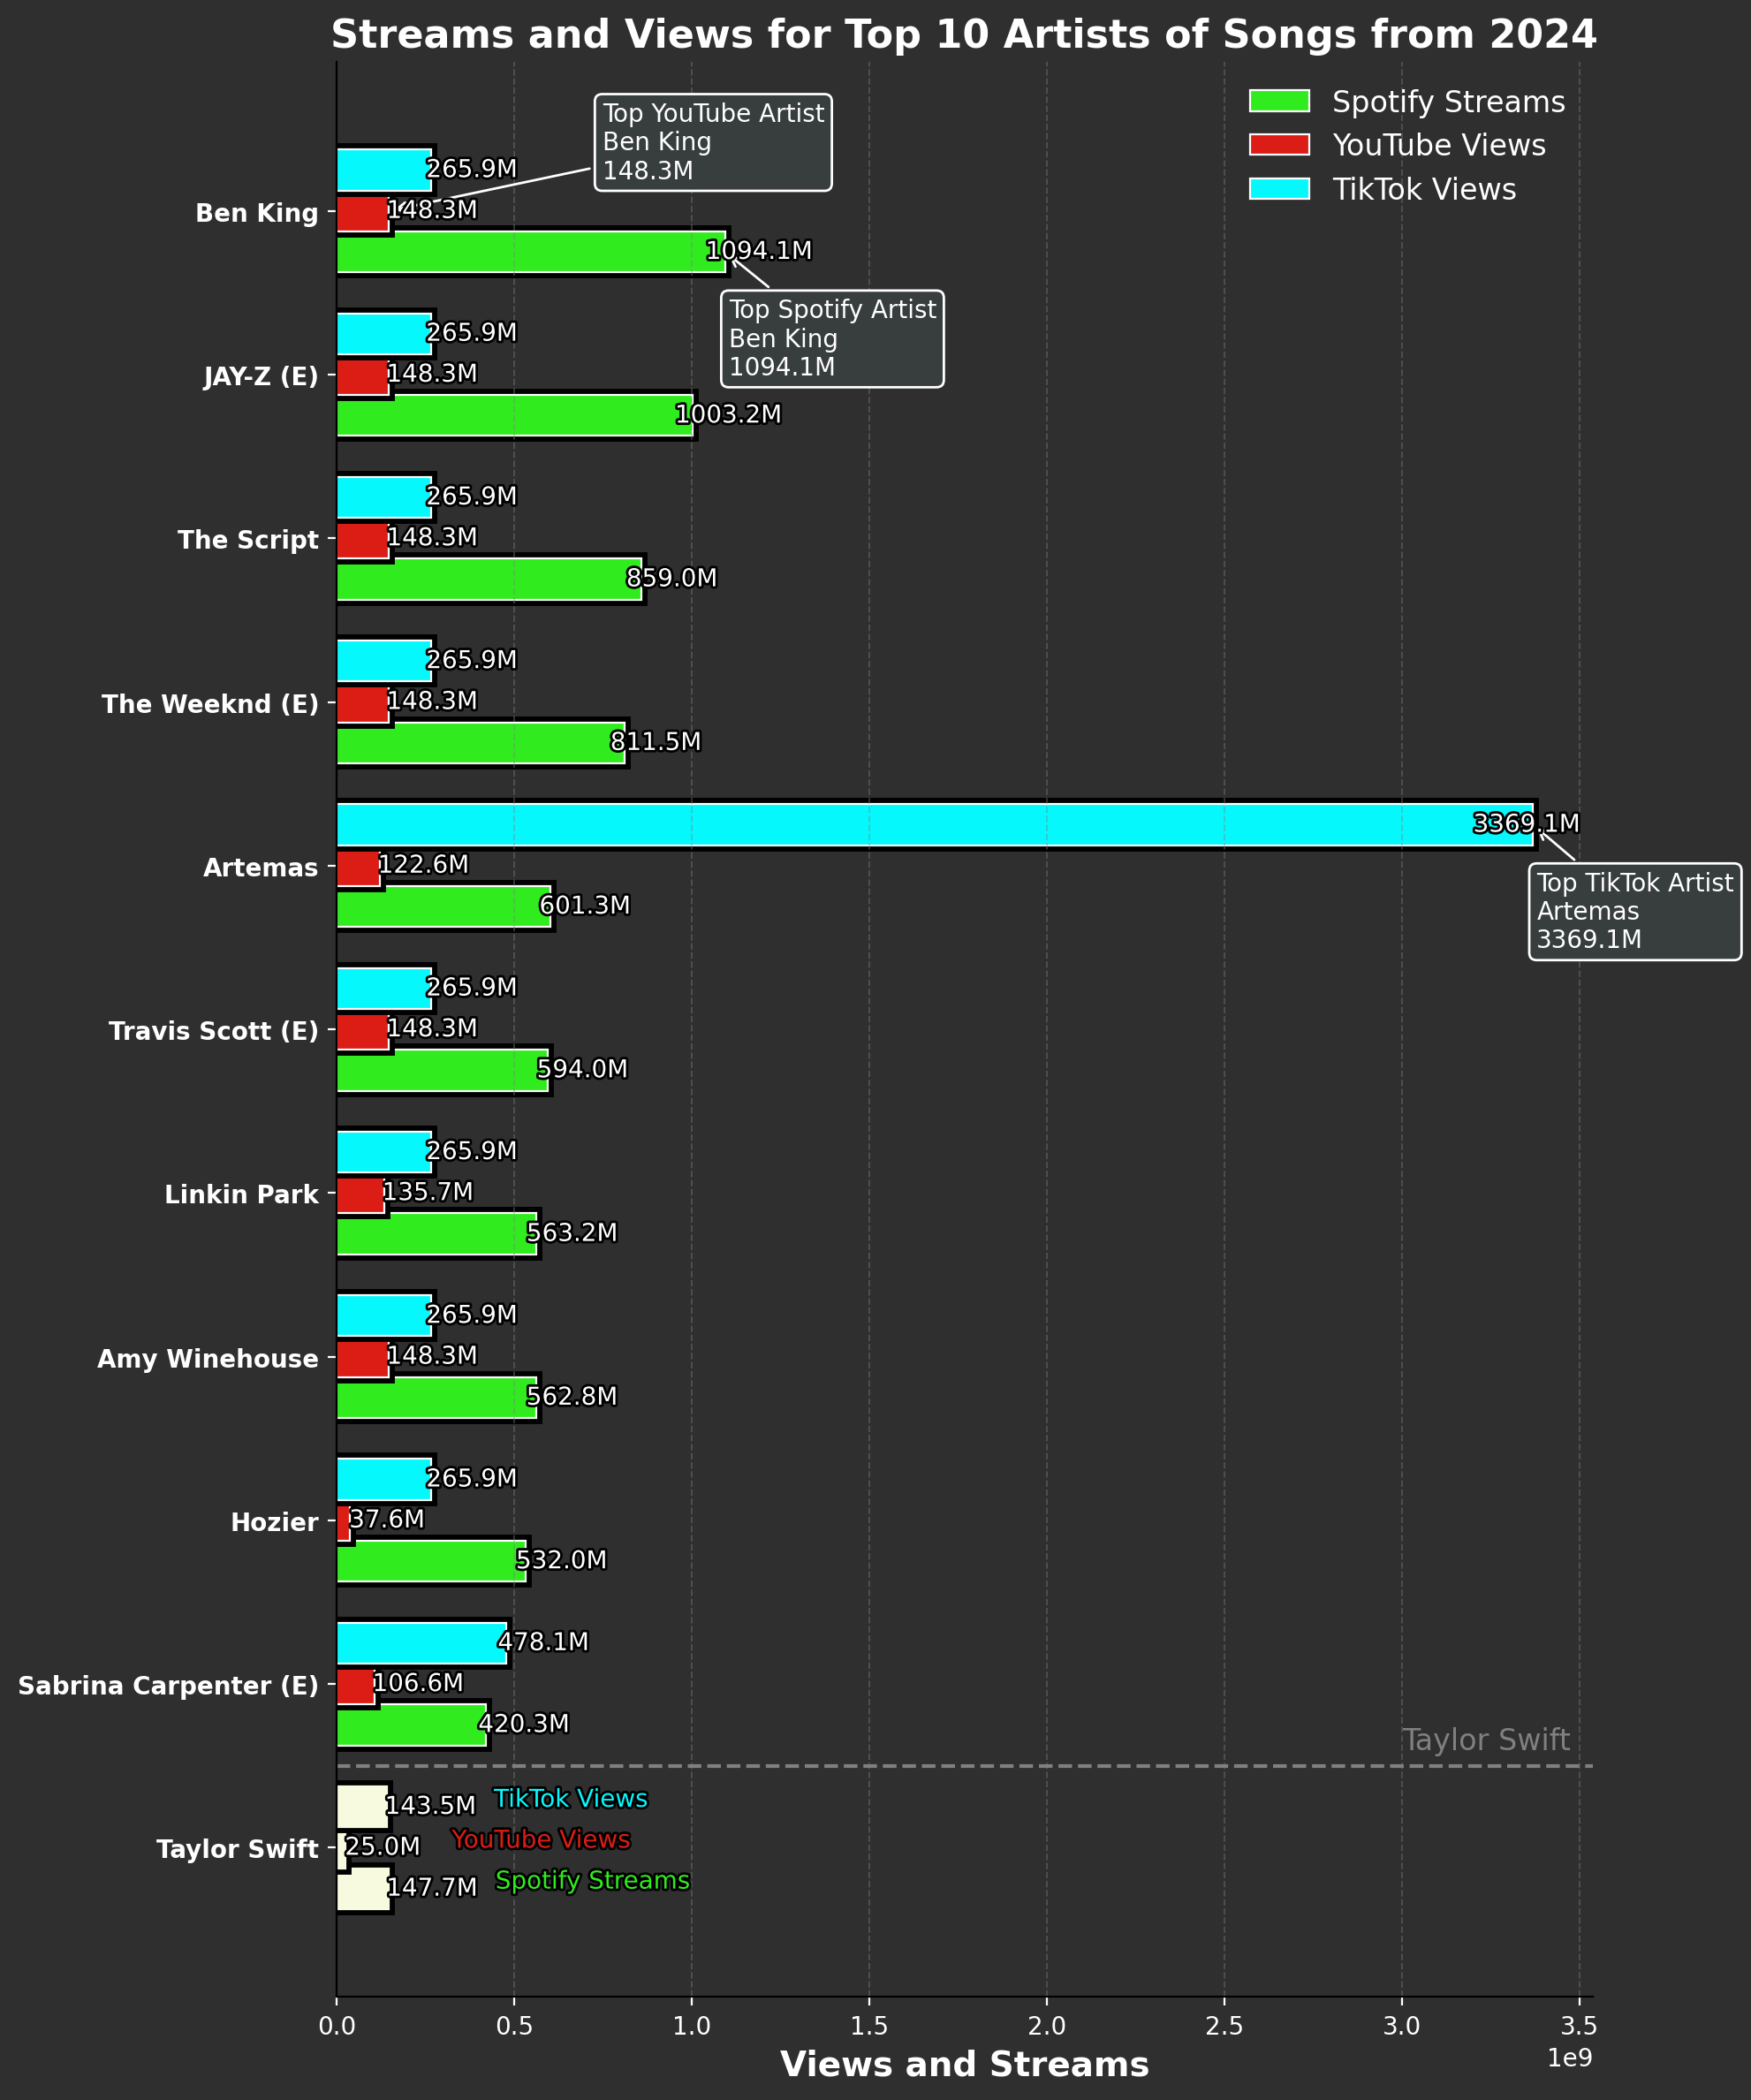

In [71]:
# Define gradient colors for each category
colors = ['#30eb1e', '#db1d16', '#05f8fc']
gradient_colors = ['#90ee90', '#ff7f7f', '#87ceeb']

taylor_edge_colors = {
    'Spotify Streams': '#30eb1e',  # Green edge for Spotify
    'YouTube Views': '#db1d16',    # Red edge for YouTube
    'TikTok Views': '#05f8fc'      # Teal edge for TikTok
}

# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 12))

# Bar width and positions
bar_width = 0.25
y_positions = np.arange(len(top_10_2024['Artist']))
y_positions = y_positions[::-1]

# Plot each category with rounded ends
bars_spotify = ax.barh(
    y=y_positions, 
    width=top_10_2024['Spotify Streams'], 
    color=colors[0],
    height=bar_width, 
    label='Spotify Streams', 
    align='center',
    edgecolor=[taylor_edge_colors['Spotify Streams'] if artist == 'Taylor Swift' else 'white' for artist in top_10_2024['Artist']], 
    linewidth=0.8  # Increase line width for visibility
)

bars_youtube = ax.barh(
    y=y_positions + bar_width, 
    width=top_10_2024['YouTube Views'], 
    color=colors[1],
    height=bar_width, 
    label='YouTube Views', 
    align='center',
    edgecolor=[taylor_edge_colors['YouTube Views'] if artist == 'Taylor Swift' else 'white' for artist in top_10_2024['Artist']], 
    linewidth=0.8  # Increase line width for visibility
)

bars_tiktok = ax.barh(
    y=y_positions + 2*bar_width, 
    width=top_10_2024['TikTok Views'], 
    color=colors[2],
    height=bar_width, 
    label='TikTok Views', 
    align='center',
    edgecolor=[taylor_edge_colors['TikTok Views'] if artist == 'Taylor Swift' else 'white' for artist in top_10_2024['Artist']], 
    linewidth=0.8  # Increase line width for visibility
)

# Add rounded caps to the bars
for bars in [bars_spotify, bars_youtube, bars_tiktok]:
    for bar in bars:
        bar.set_capstyle('round')

# Highlight Taylor Swift's bar
highlight_color = '#f7fade'  # Pink for Taylor Swift
highlight_idx = top_10_2024[top_10_2024['Artist'] == 'Taylor Swift'].index[0]

# Change color for Taylor Swift's bars
bars_spotify[highlight_idx].set_color(highlight_color)
bars_youtube[highlight_idx].set_color(highlight_color)
bars_tiktok[highlight_idx].set_color(highlight_color)

# Set y-ticks and labels with explicit track indicator
explicit_artists = top_10_2024['Artist'][top_10_2024['Explicit Track'] == 1].tolist()
ax.set_yticks(y_positions + bar_width)
ax.set_yticklabels([f"{artist} (E)" if artist in explicit_artists else artist for artist in top_10_2024['Artist']], fontsize=12, color='white', fontweight='bold')


# Add labels and title with custom font and color
ax.set_xlabel('Views and Streams', fontsize=14, color='white', fontweight='bold')
ax.set_title('Streams and Views for Top 10 Artists of Songs from 2024', fontsize=16, color='white', fontweight='bold')

# Change all other text to white
ax.tick_params(axis='x', colors='white', labelsize=10)
ax.tick_params(axis='y', colors='white', labelsize=10)

# Set axis face color to a dark theme
ax.set_facecolor('#2f2f2f')
fig.patch.set_facecolor('#2f2f2f')

# Add legend with custom style
legend = ax.legend(fontsize=12, loc='best', frameon=False, facecolor='black', edgecolor='white', labelcolor='white')
for text in legend.get_texts():
    text.set_color("white")

# Add a subtle grid with transparency
ax.grid(axis='x', color='gray', linestyle='--', linewidth=0.7, alpha=0.4)

# Hide the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add a drop shadow effect to bars
for bars in [bars_spotify, bars_youtube, bars_tiktok]:
    for bar in bars:
        bar.set_path_effects([pe.withStroke(linewidth=5, foreground='black')])

# Add annotations to highlight top Spotify, YouTube, and TikTok artists
top_spotify_artist = top_10_2024.loc[top_10_2024['Spotify Streams'].idxmax()]
top_youtube_artist = top_10_2024.loc[top_10_2024['YouTube Views'].idxmax()]
top_tiktok_artist = top_10_2024.loc[top_10_2024['TikTok Views'].idxmax()]

ax.annotate(
    f"Top Spotify Artist\n{top_spotify_artist['Artist']}\n{top_spotify_artist['Spotify Streams']/1e6:.1f}M",
    xy=(top_spotify_artist['Spotify Streams'], y_positions[top_10_2024['Artist'].tolist().index(top_spotify_artist['Artist'])]),
    xytext=(top_spotify_artist['Spotify Streams'] + 1e7, y_positions[top_10_2024['Artist'].tolist().index(top_spotify_artist['Artist'])] - 0.75),
    arrowprops=dict(facecolor='white', edgecolor='white', arrowstyle='->'),
    fontsize=10,
    color='white',
    bbox=dict(boxstyle="round,pad=0.3", edgecolor='white', facecolor='#383d3d')
)

ax.annotate(
    f"Top YouTube Artist\n{top_youtube_artist['Artist']}\n{top_youtube_artist['YouTube Views']/1e6:.1f}M",
    xy=(top_youtube_artist['YouTube Views'], y_positions[top_10_2024['Artist'].tolist().index(top_youtube_artist['Artist'])] + bar_width),
    xytext=(top_youtube_artist['YouTube Views'] + 6e8, y_positions[top_10_2024['Artist'].tolist().index(top_youtube_artist['Artist'])] + bar_width + .2),
    arrowprops=dict(facecolor='white', edgecolor='white', arrowstyle='->'),
    fontsize=10,
    color='white',
    bbox=dict(boxstyle="round,pad=0.3", edgecolor='white', facecolor='#383d3d')
)

ax.annotate(
    f"Top TikTok Artist\n{top_tiktok_artist['Artist']}\n{top_tiktok_artist['TikTok Views']/1e6:.1f}M",
    xy=(top_tiktok_artist['TikTok Views'], y_positions[top_10_2024['Artist'].tolist().index(top_tiktok_artist['Artist'])] + 2*bar_width),
    xytext=(top_tiktok_artist['TikTok Views'] + 1e7, y_positions[top_10_2024['Artist'].tolist().index(top_tiktok_artist['Artist'])] + 2*bar_width - 0.75),
    arrowprops=dict(facecolor='white', edgecolor='white', arrowstyle='->'),
    fontsize=10,
    color='white',
    bbox=dict(boxstyle="round,pad=0.3", edgecolor='white', facecolor='#383d3d')
)

# Add annotations for Taylor Swift's bars without background box
for i, artist in enumerate(top_10_2024['Artist']):
    if artist == 'Taylor Swift':
        ax.annotate(
            'Spotify Streams',
            xy=(top_10_2024['Spotify Streams'][i], y_positions[i]),
            xytext=(top_10_2024['Spotify Streams'][i] + 30e7, y_positions[i]),  # Larger offset
            fontsize=10,
            color='#30eb1e',
            path_effects=[pe.withStroke(linewidth=2, foreground="black")]
        )
        ax.annotate(
            'YouTube Views',
            xy=(top_10_2024['YouTube Views'][i], y_positions[i] + bar_width),
            xytext=(top_10_2024['YouTube Views'][i] + 30e7, y_positions[i] + bar_width),  # Larger offset
            fontsize=10,
            color='#db1d16',
            path_effects=[pe.withStroke(linewidth=2, foreground="black")]
        )
        ax.annotate(
            'TikTok Views',
            xy=(top_10_2024['TikTok Views'][i], y_positions[i] + 2*bar_width),
            xytext=(top_10_2024['TikTok Views'][i] + 30e7, y_positions[i] + 2*bar_width),  # Larger offset
            fontsize=10,
            color='#05f8fc',
            path_effects=[pe.withStroke(linewidth=2, foreground="black")]
        )

# Add annotations to bars with path effect for shadow
for bars in [bars_spotify, bars_youtube, bars_tiktok]:
    for bar in bars:
        width = bar.get_width()
        # Set the annotation position slightly inside the end of the bar
        ax.text(
            width - 0.05 * width,  # Slightly inside the bar
            bar.get_y() + bar.get_height()/2, 
            f'{width/1e6:.1f}M', 
            va='center', 
            ha='left',  # Align to the right
            fontsize=10, 
            color='white',
            path_effects=[pe.withStroke(linewidth=2, foreground="black")]
        )

# Add a horizontal line at a specific y-coordinate
taylor_swift_index = top_10_2024[top_10_2024['Artist'] == 'Taylor Swift'].index[0]
taylor_swift_y = y_positions[taylor_swift_index] + bar_width + .5

# Add the horizontal line
ax.axhline(y=taylor_swift_y, color='gray', linestyle='--', linewidth=1.5)

# Add text annotation for Taylor Swift above and to the left of the line
ax.text(
    3e9,  # Position text to the left side of the plot (adjust as needed)
    taylor_swift_y + 0.1,   # Slightly above the line
    'Taylor Swift',
    color='gray',
    fontsize=12
)

# Adjust layout
fig.tight_layout()

# Show the plot
plt.show()


In [ ]:
print('amount of artists', len(spotify.Artist.unique()))
print('ammount of songs', len(spotify.Track.unique()))
print('max streams', spotify['Spotify Streams'].max())
print('min streams', spotify['Spotify Streams'].min())
# Sort by 'Release Date'
sorted_songs = spotify.sort_values(by='Release Date')

# Find the oldest and most recent song
oldest_song = sorted_songs.iloc[0]
most_recent_song = sorted_songs.iloc[-1]
most_recent_song